<a href="https://colab.research.google.com/github/Udaykamal2005/OIBSIP/blob/main/Project_5_Proposal_Level_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Cell 1: install (optional) packages
!pip install -q imbalanced-learn

# sklearn, pandas, matplotlib, seaborn usually available in Colab
print("Packages installed / available.")


Packages installed / available.


In [ ]:
# Cell 2: Upload CSV (this will create df)
from google.colab import files
import io, pandas as pd

print("Please upload 'creditcard.csv' (or your CSV file).")
uploaded = files.upload()

if not uploaded:
    raise RuntimeError("No file uploaded. Re-run and upload your CSV file.")

# pick the first uploaded file automatically
filename = list(uploaded.keys())[0]
print("Using uploaded file:", filename)

# try reading normally, fallback to latin1 if unicode errors
try:
    df = pd.read_csv(io.BytesIO(uploaded[filename]), low_memory=False)
except Exception as e:
    print("Standard read failed, retrying with latin1 encoding:", e)
    df = pd.read_csv(io.BytesIO(uploaded[filename]), encoding='latin1', low_memory=False)

print("Loaded dataframe shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()


Please upload 'creditcard.csv' (or your CSV file).


Saving creditcard.csv to creditcard.csv
Using uploaded file: creditcard.csv
Loaded dataframe shape: (284807, 31)
Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Cell 3: dtypes, missing values, target distribution
print("Shape:", df.shape)
print("\nDtypes (first 10):")
print(df.dtypes.head(10))

print("\nMissing values per column (top 10):")
display(df.isna().sum().sort_values(ascending=False).head(10))

print("\nClass distribution (fraud vs non-fraud):")
display(df['Class'].value_counts())
display((df['Class'].value_counts(normalize=True) * 100).round(4))


Shape: (284807, 31)

Dtypes (first 10):
Time    float64
V1      float64
V2      float64
V3      float64
V4      float64
V5      float64
V6      float64
V7      float64
V8      float64
V9      float64
dtype: object

Missing values per column (top 10):


,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0



Class distribution (fraud vs non-fraud):


,count
Class,
0,284315
1,492


,proportion
Class,
0,99.8273
1,0.1727


Amount summary:


,Amount
count,284807.000000
mean,88.349619
std,250.120109
min,0.000000
25%,5.600000
50%,22.000000
75%,77.165000
max,25691.160000


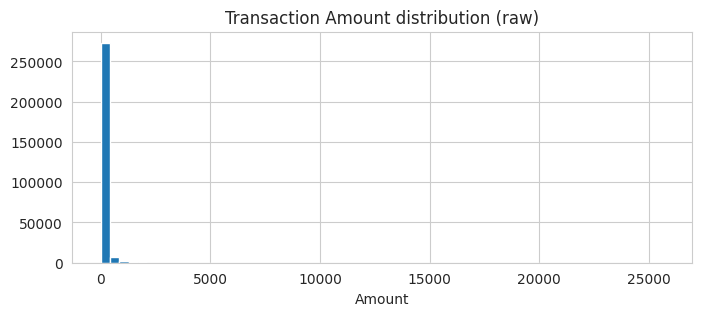

Top 5 fraud transactions by Amount:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
176049,122608.0,-2.003460,-7.159042,-4.050976,1.309580,-2.058102,-0.098621,2.880083,-0.727484,1.460381,...,1.244287,-1.015232,-1.800985,0.657586,-0.435617,-0.894509,-0.397557,0.314262,2125.87,1
6971,9064.0,-3.499108,0.258555,-4.489558,4.853894,-6.974522,3.628382,5.431271,-1.946734,-0.775680,...,-1.052368,0.204817,-2.119007,0.170279,-0.393844,0.296367,1.985913,-0.900452,1809.68,1
249167,154278.0,-1.600211,-3.488130,-6.459303,3.246816,-1.614608,-1.260375,0.288223,-0.048964,-0.734975,...,1.191175,-0.967141,-1.463421,-0.624231,-0.176462,0.400348,0.152947,0.477775,1504.93,1
89190,62467.0,-5.344665,-0.285760,-3.835616,5.337048,-7.609909,3.874668,1.289630,0.201742,-3.003532,...,0.276011,1.342045,-1.016579,-0.071361,-0.335869,0.441044,1.520613,-1.115937,1402.16,1
81609,59011.0,-2.326922,-3.348439,-3.513408,3.175060,-2.815137,-0.203363,-0.892144,0.333226,-0.802005,...,1.226648,-0.695902,-1.478490,-0.061553,0.236155,0.531911,0.302324,0.536375,1389.56,1


In [ ]:
# Cell 4: basic EDA
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

print("Amount summary:")
display(df['Amount'].describe())

# histogram of Amount (log scale shown)
plt.figure(figsize=(8,3))
plt.hist(df['Amount'].replace(0, 0.001), bins=60)
plt.title('Transaction Amount distribution (raw)')
plt.xlabel('Amount')
plt.show()

# top 5 largest fraud amounts
print("Top 5 fraud transactions by Amount:")
display(df[df['Class']==1].sort_values('Amount', ascending=False).head(5))


In [ ]:
# Cell 5: create X (features) and y (target), scale Amount
from sklearn.preprocessing import StandardScaler
import numpy as np

# target y
y = df['Class'].copy()

# features: drop Class and Time (Time less useful here)
X = df.drop(['Class','Time'], axis=1).copy()

# Scale Amount (V1..V28 are already PCA components in this dataset)
scaler = StandardScaler()
X['Amount_scaled'] = scaler.fit_transform(X[['Amount']])
X = X.drop(['Amount'], axis=1)

print("X shape:", X.shape, "y shape:", y.shape)
display(X.head())


X shape: (284807, 29) y shape: (284807,)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [ ]:
# Cell 6: stratified train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("Train size:", X_train.shape, "Test size:", X_test.shape)
print("Train class distribution:", y_train.value_counts().to_dict())
print("Test class distribution:", y_test.value_counts().to_dict())


Train size: (227845, 29) Test size: (56962, 29)
Train class distribution: {0: 227451, 1: 394}
Test class distribution: {0: 56864, 1: 98}


In [ ]:
# Cell 7: baseline logistic regression with class_weight='balanced'
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

clf_lr = LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear')
clf_lr.fit(X_train, y_train)

y_pred_lr = clf_lr.predict(X_test)
y_proba_lr = clf_lr.predict_proba(X_test)[:,1]

print("Logistic Regression (balanced) classification report:")
print(classification_report(y_test, y_pred_lr, digits=4))
print("ROC AUC (LR):", roc_auc_score(y_test, y_proba_lr))


Logistic Regression (balanced) classification report:
              precision    recall  f1-score   support

           0     0.9999    0.9746    0.9871     56864
           1     0.0587    0.9184    0.1104        98

    accuracy                         0.9745     56962
   macro avg     0.5293    0.9465    0.5488     56962
weighted avg     0.9982    0.9745    0.9856     56962

ROC AUC (LR): 0.9713855400066612


In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd

sm = SMOTE(random_state=42)
# ensure no NaNs in X_train
X_train_fill = X_train.fillna(0)
X_train_res, y_train_res = sm.fit_resample(X_train_fill, y_train)
print("After SMOTE, counts:", pd.Series(y_train_res).value_counts().to_dict())

After SMOTE, counts: {0: 227451, 1: 227451}


In [ ]:
# FIX CELL: Safely regenerate RandomForest and proba_rf

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np

print("Running proba_rf fix...")

# ---- Step 1: Check if X_train_res exists (SMOTE step) ----
if 'X_train_res' not in globals() or 'y_train_res' not in globals():
    raise RuntimeError("ERROR: You must run the SMOTE cell before this fix cell.")

# Ensure no NaNs in training/test data
X_train_res_fix = X_train_res.fillna(0)
X_test_fix = X_test.fillna(0)

# ---- Step 2: Check if clf_rf exists and is fitted ----
need_retrain = False

if 'clf_rf' in globals():
    try:
        # check number of trees
        tree_count = len(clf_rf.estimators_)
        print("clf_rf found with estimators:", tree_count)
        if tree_count == 0:
            print("clf_rf has NO trained trees → will retrain.")
            need_retrain = True
    except:
        print("clf_rf exists but cannot be inspected → retraining.")
        need_retrain = True
else:
    print("clf_rf does NOT exist → retraining now.")
    need_retrain = True

# ---- Step 3: Retrain RF if required ----
if need_retrain:
    from sklearn.ensemble import RandomForestClassifier
    clf_rf = RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        n_jobs=-1
    )
    clf_rf.fit(X_train_res_fix, y_train_res)
    print("Retrained RandomForest successfully.")

# ---- Step 4: Compute proba_rf ----
try:
    proba_rf = clf_rf.predict_proba(X_test_fix)[:,1]
    pred_rf = clf_rf.predict(X_test_fix)
    print("SUCCESS: proba_rf and pred_rf created.")
    print("Sample probabilities:", proba_rf[:5])
    print("ROC AUC:", roc_auc_score(y_test, proba_rf))
except Exception as e:
    print("ERROR while computing probabilities:", e)


Running proba_rf fix...
clf_rf does NOT exist → retraining now.
Retrained RandomForest successfully.
SUCCESS: proba_rf and pred_rf created.
Sample probabilities: [0. 0. 0. 0. 0.]
ROC AUC: 0.9736690944667118


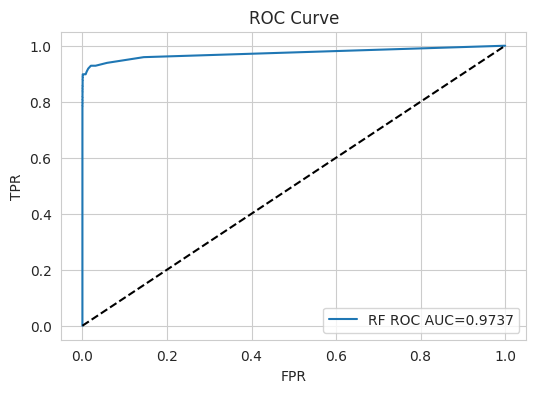

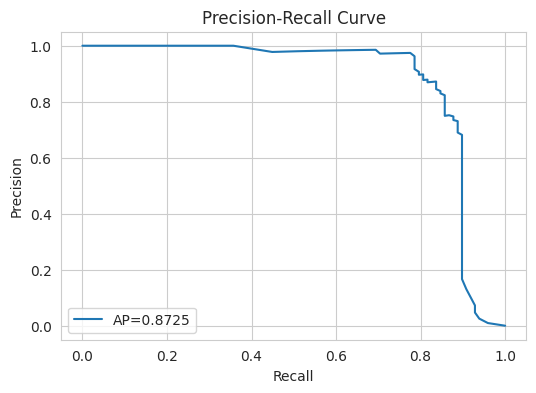

In [ ]:
# Cell 10: ROC and Precision-Recall curves for RandomForest
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, average_precision_score
from sklearn.metrics import roc_auc_score

fpr, tpr, _ = roc_curve(y_test, proba_rf)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'RF ROC AUC={roc_auc_score(y_test, proba_rf):.4f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title('ROC Curve'); plt.legend()
plt.show()

precision, recall, _ = precision_recall_curve(y_test, proba_rf)
ap = average_precision_score(y_test, proba_rf)
plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'AP={ap:.4f}')
plt.xlabel('Recall'); plt.ylabel('Precision'); plt.title('Precision-Recall Curve'); plt.legend()
plt.show()


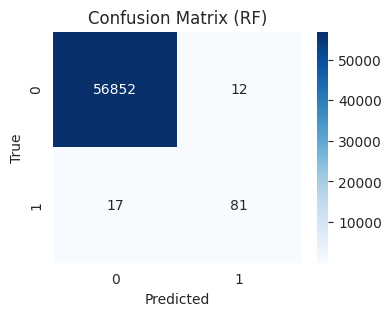

Actual frauds in test set: 98
Predicted frauds by RF: 93


In [ ]:
# Cell 11: confusion matrix and predicted/actual fraud counts
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, pred_rf)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted'); plt.ylabel('True'); plt.title('Confusion Matrix (RF)')
plt.show()

print("Actual frauds in test set:", int(y_test.sum()))
print("Predicted frauds by RF:", int(pred_rf.sum()))


In [ ]:
# Cell 12: show examples of false negatives (actual=1 predicted=0) and false positives
import numpy as np
test_df = X_test.copy()
test_df['y_true'] = y_test.values
test_df['y_pred'] = pred_rf
# false negatives
fn = test_df[(test_df['y_true']==1) & (test_df['y_pred']==0)]
fp = test_df[(test_df['y_true']==0) & (test_df['y_pred']==1)]
print("Number of false negatives:", len(fn))
print("Number of false positives:", len(fp))
display("Sample false negatives (first 5):", fn.head())
display("Sample false positives (first 5):", fp.head())


Number of false negatives: 17
Number of false positives: 12


'Sample false negatives (first 5):'

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount_scaled,y_true,y_pred
70589,-2.042608,1.573578,-2.372652,-0.572676,-2.097353,-0.174142,-3.039520,-1.634233,-0.594809,-5.459602,...,0.501222,-0.696892,-0.600514,0.127547,-0.786072,0.606097,0.171697,0.693749,1,0
8972,-4.064005,3.100935,-1.188498,3.264633,-1.903562,0.320351,-0.954940,-3.277535,2.820829,1.015113,...,-0.078845,0.193731,0.479496,-0.506603,-0.409863,-3.036271,-0.630605,0.365067,1,0
50537,-0.234922,0.355413,1.972183,-1.255593,-0.681387,-0.665732,0.059110,-0.003153,1.122451,-1.481246,...,0.912107,-0.286338,0.451208,0.188315,-0.531846,0.123185,0.039581,-0.349231,1,0
157585,1.934946,0.650678,-0.286957,3.987828,0.316052,-0.099449,-0.021483,-0.172327,0.508730,1.072955,...,-0.190974,0.219976,-0.216597,-0.136692,-0.129954,-0.050077,-0.051082,-0.349231,1,0
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1.761758,1,0


'Sample false positives (first 5):'

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount_scaled,y_true,y_pred
190263,-1.272117,1.827615,-3.810610,0.583759,-0.641242,-1.389043,-1.954054,1.173920,-2.053191,-3.345061,...,0.858775,0.083079,0.741676,-0.173234,0.534870,0.183562,0.020316,-0.350191,0,1
93527,1.100390,0.913562,-0.131077,3.051313,0.394822,-0.092167,0.023967,0.098450,-0.343247,-0.600671,...,-0.289544,-0.091371,-0.117883,0.564197,0.107692,0.059026,0.074707,-0.349231,0,1
14920,-17.950631,11.067069,-20.742660,6.075531,-13.389765,-4.532888,-15.188146,12.101062,-4.026880,-9.017413,...,-1.275675,-0.705046,0.102040,1.177477,-0.238730,1.554463,0.547948,-0.349231,0,1
153457,-3.141115,2.014154,-0.610409,5.946659,-1.868534,0.756737,-3.313842,0.227978,-0.937894,-0.976492,...,0.800389,0.514926,-0.049373,-0.510364,0.442583,-0.165737,0.682784,-0.171276,0,1
197403,1.902179,1.025712,-2.058218,4.026855,1.420530,0.398184,0.107490,0.167953,-0.937791,0.280431,...,-0.129987,-0.000784,-0.090034,0.184273,0.079979,0.000519,0.007968,-0.350191,0,1


In [ ]:
# Cell 14: inference demo on sample X_test rows
sample = X_test.sample(5, random_state=1)
probs = clf_rf.predict_proba(sample.fillna(0))[:,1]
preds = clf_rf.predict(sample.fillna(0))
display(sample)
print("Predicted probabilities:", probs)
print("Predicted labels:", preds)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_scaled
100737,-0.582809,-0.186214,2.668955,-0.812159,-1.586665,0.490834,-1.051076,0.414547,0.443001,0.220555,...,0.121284,0.241500,1.051246,-0.162441,0.462818,-0.050183,-0.083646,0.100930,0.087351,-0.341235
12147,-0.007403,0.258208,1.878922,-0.471597,-0.886574,-0.582105,-0.402487,-0.926714,1.977015,-1.280846,...,-0.273728,0.687315,-0.128478,-0.209639,0.754155,0.782618,1.031000,0.040751,0.191883,-0.232087
218237,-1.036876,1.549195,0.153311,-0.936236,1.230715,0.181149,0.466963,-1.587515,-0.670755,-0.911953,...,-0.316389,1.192072,-1.557625,-0.107941,0.179662,0.700380,0.296183,-0.190557,-0.034479,-0.349671
222554,1.875083,-0.376752,-0.842887,1.484380,-0.117696,0.146163,-0.213155,0.156950,1.118642,0.189611,...,-0.334022,-0.307447,-0.651344,0.172938,-0.540014,0.003387,-0.806691,0.022447,-0.056450,-0.210498
199457,-0.224034,-0.805138,1.205170,-2.303588,-0.225663,-0.954016,-0.051443,-0.401533,-2.098284,1.033634,...,-0.102864,-0.099978,0.236353,-0.107553,-0.019377,-0.187441,-0.150707,-0.030672,-0.073963,-0.253277


Predicted probabilities: [0. 0. 0. 0. 0.]
Predicted labels: [0 0 0 0 0]


In [ ]:
# Cell 15: troubleshooting helper — checks and repairs for common NameErrors
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

print("Checking key variables in workspace:")
for name in ['df','X','y','X_train','X_test','y_train','y_test','X_train_res','y_train_res','clf_rf','proba_rf','pred_rf']:
    print(name, "in globals() ->", name in globals())

# If clf_rf exists but is unfitted (estimators_ empty), retrain quickly
if 'clf_rf' in globals():
    try:
        n = len(globals()['clf_rf'].estimators_)
        print("clf_rf estimators_ length:", n)
        if n == 0:
            print("clf_rf appears unfitted — retraining small RF now.")
            clf_rf = RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)
            clf_rf.fit(X_train_res.fillna(0), y_train_res)
            globals()['clf_rf'] = clf_rf
            print("Retrained clf_rf.")
    except Exception as e:
        print("Could not inspect/retrain clf_rf:", e)
else:
    print("clf_rf not in globals(). Re-run training cell (Cell 9).")


Checking key variables in workspace:
df in globals() -> True
X in globals() -> True
y in globals() -> True
X_train in globals() -> True
X_test in globals() -> True
y_train in globals() -> True
y_test in globals() -> True
X_train_res in globals() -> True
y_train_res in globals() -> True
clf_rf in globals() -> True
proba_rf in globals() -> True
pred_rf in globals() -> True
clf_rf estimators_ length: 100
